### Credenciais de Acesso Kaggle

In [1]:
{"username":"jcss03","key":"caf02cc87bdafff295f9eb6897072757"}

{'username': 'jcss03', 'key': 'caf02cc87bdafff295f9eb6897072757'}

### Imports

In [2]:
!pip install opendatasets
!pip install pandas

import opendatasets as od
import pandas
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import re

from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Download Dataset

In [3]:

# download data from kaggle
od.download("https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis/download?datasetVersionNumber=2")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jcss03
Your Kaggle Key: ··········


100%|██████████| 1.99M/1.99M [00:00<00:00, 71.5MB/s]

In [4]:
# caminho para o dataset
!ls ./twitter-entity-sentiment-analysis

twitter_training.csv  twitter_validation.csv


### Acesso ao Drive

In [5]:
# Acesso a pasta do drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [6]:
# exemplo
!ls /content/drive/MyDrive/'Trabalho de Graduação'/scripts

 classifier.ipynb	      model		       'scripts testes'
 data			      overfitting_model.ipynb
 Exploratory_Analysis.ipynb   projectRoadmap


### Exploratory Data Analysis - Preprocessing Data
* load data
* Simple Info
* Encoding Label
* Remoção de Null values
* Graficos

In [10]:
dataset_train = pd.read_csv('./twitter-entity-sentiment-analysis/twitter_training.csv',names=['Tweet_ID','entity','sentiment','Tweet content'],header=None)
dataset_validation = pd.read_csv('./twitter-entity-sentiment-analysis/twitter_validation.csv',names=['Tweet_ID','entity','sentiment','Tweet content'],header=None)

In [11]:
print('Exemplo do dataset')
dataset_train.sample(5)

Exemplo do dataset


,Tweet_ID,entity,sentiment,Tweet content
73113,8925,Nvidia,Negative,Crypto dumping is super bullish for Chinese po...
60330,3538,Facebook,Irrelevant,OMG! Never thought people could go down to su...
64598,7866,MaddenNFL,Negative,@ EAMaddenNFL how do you manage to make a game...
20990,12793,WorldOfCraft,Positive,"Ah, this is SO awesome! I bought absolutely ev..."
22113,4184,CS-GO,Neutral,? RhandlerR . . Why does my POV sometimes get ...


In [12]:
print('#'*100)
print(f'Features of train dataset: {dataset_train.columns}')
print(f'Features of test dataset: {dataset_validation.columns}')

print('#'*100)
print(f'shape of train dataset: {dataset_train.shape}')
print('Count of rows in the train data is:  ', len(dataset_train))
print(f'shape of test dataset: {dataset_validation.shape}')
print('Count of rows in the teste data is:  ', len(dataset_validation))

print('#'*100)
qtd_null_values = np.sum(dataset_train.isnull().any(axis=1))
print(f'Number null values train dataset: {qtd_null_values}')
qtd_null_values_teste = np.sum(dataset_validation.isnull().any(axis=1))
print(f'Number null values teste dataset: {qtd_null_values_teste}')

print('#'*100)
train_entity = dataset_train['entity'].unique()
train_entity_n = dataset_train['entity'].nunique()
print(f'Entidades train: {train_entity}')
print(f'Quantidade de Entidades train: {train_entity_n}')

print('#'*100)
test_entity = dataset_validation['entity'].unique()
test_entity_n = dataset_validation['entity'].nunique()
print(f'Entidades test: {test_entity}')
print(f'Quantidade de Entidades test: {test_entity_n}')

print('#'*100)
print('Info')
print(dataset_train.info())

print('#'*100)
print('Info')
print(dataset_validation.info())

####################################################################################################
Features of train dataset: Index(['Tweet_ID', 'entity', 'sentiment', 'Tweet content'], dtype='object')
Features of test dataset: Index(['Tweet_ID', 'entity', 'sentiment', 'Tweet content'], dtype='object')
####################################################################################################
shape of train dataset: (74682, 4)
Count of rows in the train data is:   74682
shape of test dataset: (1000, 4)
Count of rows in the teste data is:   1000
####################################################################################################
Number null values train dataset: 686
Number null values teste dataset: 0
####################################################################################################
Entidades train: ['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Goo

### Enconding Labels
* Positive - 3
* Neutral - 2
* Negative - 1
* Irrelevant - 0

In [13]:
# enconding targets
data = dataset_train[['Tweet content','sentiment']].rename(columns={"Tweet content": "text", "sentiment": "target"})
data.target = pd.Categorical(data.target)

data['code'] = data.target.cat.codes
print('#'*100)
print(f'Targets: {data.target.unique()}')
print(f'Codes: {data.code.unique()}')
print('#'*100)
data.sample(5)

####################################################################################################
Targets: ['Positive', 'Neutral', 'Negative', 'Irrelevant']
Categories (4, object): ['Irrelevant', 'Negative', 'Neutral', 'Positive']
Codes: [3 2 1 0]
####################################################################################################


,text,target,code
48539,"please don’t come to home alone today, bother ...",Negative,1
72023,I keep reading are lot about how the newest up...,Neutral,2
41592,"Battlefield 4 is still so good, they had it al...",Positive,3
66909,"J+J Fund Tucker Carlson with their ad buys, ma...",Negative,1
6845,I thought going after workers for safety whist...,Negative,1


### Removing Null values

In [14]:
# removing null values
print('#'*100)
qtd_null_values = np.sum(data.isnull().any(axis=1))
print(f'Shape dos dados: {data.shape}')
print(f'Number null values = {qtd_null_values}')

# dropna values
data = data.dropna().reset_index(drop=True)

print('#'*100)
qtd_null_values = np.sum(data.isnull().any(axis=1))
print(f'Shape dos dados: {data.shape}')
print(f'Number null values = {qtd_null_values}')

####################################################################################################
Shape dos dados: (74682, 3)
Number null values = 686
####################################################################################################
Shape dos dados: (73996, 3)
Number null values = 0


### Analyzing text statistics

<BarContainer object of 4 artists>

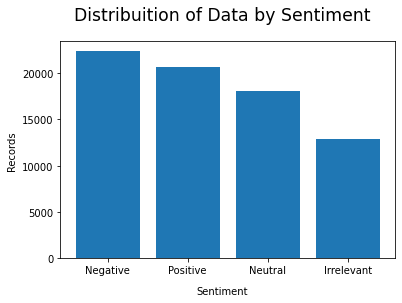

In [15]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

# set title and axis labels
plt.suptitle('Distribuition of Data by Sentiment', x=0.5, y=1, ha='center', fontsize='xx-large')
fig.text(0.5, 0.002, 'Sentiment', ha='center')
fig.text(0.002, 0.5, 'Records', va='center', rotation='vertical')

plt.bar(data['target'].value_counts().index, data['target'].value_counts())

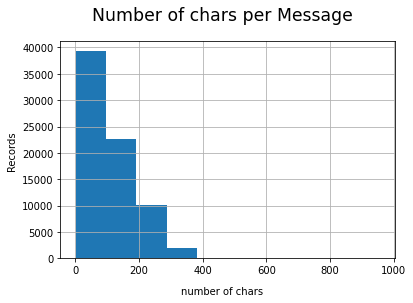

In [16]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

# set title and axis labels
plt.suptitle('Number of chars per Message', x=0.5, y=1, ha='center', fontsize='xx-large')
fig.text(0.5, 0.002, 'number of chars', ha='center')

fig.text(0.002, 0.5, 'Records', va='center', rotation='vertical')

data['text'].str.len().hist(ax=axes)

Number of words per message


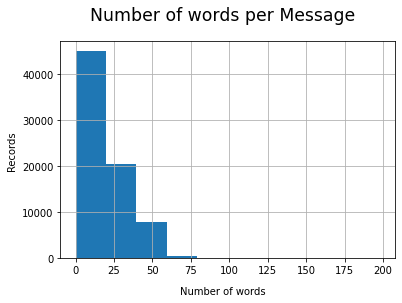

In [17]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

# set title and axis labels
plt.suptitle('Number of words per Message', x=0.5, y=1, ha='center', fontsize='xx-large')
fig.text(0.5, 0.002, 'Number of words', ha='center')
fig.text(0.002, 0.5, 'Records', va='center', rotation='vertical')
print('Number of words per message')
data['text'].str.split().map(lambda x: len(x)).hist(ax=axes)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


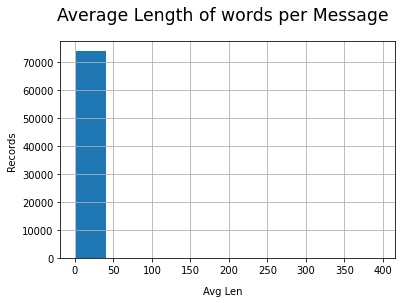

In [18]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

# set title and axis labels
plt.suptitle('Average Length of words per Message', x=0.5, y=1, ha='center', fontsize='xx-large')
fig.text(0.5, 0.002, 'Avg Len', ha='center')
fig.text(0.002, 0.5, 'Records', va='center', rotation='vertical')

data['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(ax=axes)

<BarContainer object of 10 artists>

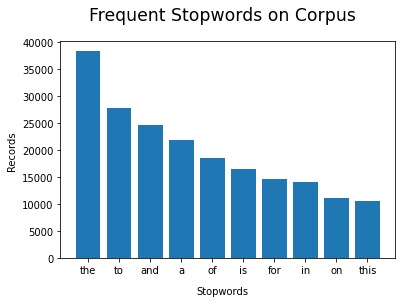

In [19]:
stop=set(stopwords.words('english'))
corpus=[]

sentences = data['text'].str.split().values.tolist()

corpus=[word for i in sentences for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

# set title and axis labels
plt.suptitle('Frequent Stopwords on Corpus', x=0.5, y=1, ha='center', fontsize='xx-large')
fig.text(0.5, 0.002, 'Stopwords', ha='center')
fig.text(0.002, 0.5, 'Records', va='center', rotation='vertical')

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

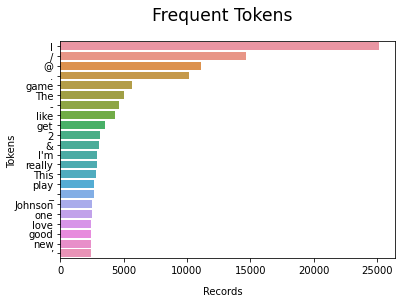

In [20]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

stop=set(stopwords.words('english'))

sentences = data['text'].str.split().values.tolist()

corpus=[word for i in sentences for word in i]

counter=Counter(corpus)
most=counter.most_common()
x, y=[], []
for word,count in most[:70]:
    if (word not in stop):
        x.append(word)
        y.append(count)

# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

# set title and axis labels
plt.suptitle('Frequent Tokens', x=0.5, y=1, ha='center', fontsize='xx-large')
fig.text(0.5, 0.002, 'Records', ha='center')
fig.text(0.002, 0.5, 'Tokens', va='center', rotation='vertical')

        
sns.barplot(x=y,y=x,ax=axes)

### Processing Text
* stopwords
* punctuation
* Stemming(reducing the words to their derived stems)
* Lemmatization(reducing the derived words to their root form known as lemma)
* removing unnecessary characters
* lower case text to better generalization

In [21]:
# recebe texto e processa
def processing_text(text,flag_punctuation=False,flag_stopwords=False,flag_stem=False,flag_lemma=False,flag_num=False):
    # maketrans explained - 'https://www.w3schools.com/python/ref_string_maketrans.asp'
    def cleaning_punctuations(text):
        english_punctuations = string.punctuation
        punctuations_list = english_punctuations

        translator = str.maketrans('', '', punctuations_list)
        return text.translate(translator)
    # remover stopwords
    def remove_stopwords(text):
        stop_words = set(stopwords.words('english'))
        text = " ".join([word for word in text.split(' ') if word not in stop_words])
        return text
    
    # removendo chars repetidos
    def cleaning_repeating_char(text):
        return re.sub(r'(.)1+', r'1', text)
    
    # removing stem
    def stemming(text):
        ps = PorterStemmer()
        text = " ".join([ps.stem(word) for word in text.split(' ')])
        return text
    
    def lemmatizer(text):
        lm = nltk.WordNetLemmatizer()
        text = " ".join([lm.lemmatize(word) for word in text.split(' ')])
        return text
    
    def remove_numbers(text):
        text = ''.join([i for i in text if not i.isdigit()])
        return text
    
    # lower all string of text
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    # remover pontuações
    if flag_punctuation:
        text = cleaning_punctuations(text)

    # remover stopwords
    if flag_stopwords:
        text = remove_stopwords(text)

    # remover repetições
    text = cleaning_repeating_char(text)

    # lenma
    if flag_lemma:
        text = lemmatizer(text)

    # stem:
    if flag_stem:
        text = stemming(text)
        
    # numbers
    if flag_num:
        text = remove_numbers(text)

    return text

In [22]:
example = data.text.iloc[100]
example

'Grounded almost was pretty cool even despite the top tier unfunny writing until we became yet another annoying crafting game. I seriously can’t wait on this shitty trend to die'

In [23]:
clean_text = processing_text(example,flag_punctuation=True,flag_stopwords=True,flag_lemma=True)
clean_text

'grounded almost pretty cool even despite top tier unfunny writing became yet another annoying crafting game seriously cant wait shitty trend die'

In [24]:
# clean text
data['clean_text'] = data['text'].apply(lambda x: processing_text(x,flag_punctuation=True,flag_stopwords=True,flag_lemma=True))

In [25]:
data.sample(10)

,text,target,code,clean_text
28861,Will love the Re45 forever...,Positive,3,love re45 forever
60059,The fights. @ ajplascencia083 @ Gonzalez _ 02 _,Irrelevant,0,fight ajplascencia083 gonzalez 02
34425,Fortnite is now making world premieres on trac...,Negative,1,fortnite making world premiere track im fuckin...
52011,Red Dead Redemption 2 is the best game experie...,Positive,3,red dead redemption 2 best game experience ive...
8705,Overwatch has wrecked me,Negative,1,overwatch wrecked
34663,"Microsoft News says that now, after the debate...",Neutral,2,microsoft news say debate people rush conflict...
58106,A friend shared this with me and I thought a l...,Negative,1,friend shared thought lot conservative racist ...
51523,The . Red Dead Redemption 2 pic.twitter.com/2...,Neutral,2,red dead redemption 2 pictwittercom2xblcpjlxl
835,<unk> love u guys,Positive,3,unk love u guy
41668,Had some fun and GGs with @ NeXu5 _ TTV today!...,Irrelevant,0,fun ggs nexu5 ttv today sent fam afterwards ...


In [26]:
# fig, ax = plt.subplots()
# fig.suptitle("target", fontsize=12)
# data["target"].reset_index().groupby("target").count().sort_values(by= 
#        "index").plot(kind="barh", legend=False, 
#         ax=ax).grid(axis='x')
# plt.show()

In [ ]:
# data = data[data.target != 'Irrelevant']


In [28]:
# print(data.target.unique())
# print(data.code.unique())


### Split dataset_train 
* train
* validation

In [29]:
from sklearn.model_selection import train_test_split

# split dataset
df_train, df_val = train_test_split(data[['code','clean_text']], test_size=0.3)

## get target
target_train = df_train["code"].values
target_val = df_val["code"].values

### Vectorizing Tokens

In [30]:
max_length = int(data['clean_text'].str.len().max())
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # OOV = Out of Vocabulary

In [31]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional


In [32]:
train_text = df_train['clean_text']

tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(train_text)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_text)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(df_val['clean_text'])
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

### Inputs

In [33]:
print('Train padded',train_padded.shape)
print('Val padded',val_padded.shape)

print('Train labels',target_train.shape)
print('Val labels',target_val.shape)

Train padded (51797, 810)
Val padded (22199, 810)
Train labels (51797,)
Val labels (22199,)


In [34]:
inputs_train = train_padded.reshape(train_padded.shape[0],train_padded.shape[1],1)

inputs_val = val_padded.reshape(val_padded.shape[0],val_padded.shape[1],1)

print('Train padded',inputs_train.shape)
print('Val padded',inputs_val.shape)

input_shape = (inputs_train.shape[1],inputs_train.shape[2])

Train padded (51797, 810, 1)
Val padded (22199, 810, 1)


In [35]:
n_classes = data.code.nunique()
print(n_classes)

4


### Deep Learning

In [36]:
model = keras.Sequential()
n_classes
words_count = len(word_index) + 1
n_dim = 64

model.add(Embedding(words_count,n_dim,input_length = (inputs_train.shape[1])))
# model.add(keras.layers.Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(128,return_sequences=True)))

# model.add(keras.layers.BatchNormalization(gamma_regularizer=keras.regularizers.L2(0.01)))
model.add(keras.layers.BatchNormalization())
#model.add(keras.layers.SpatialDropout1D(0.2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(64,kernel_regularizer=keras.regularizers.L1L2(l1=0.00001,l2=0.1)))) 
#model.add(keras.layers.Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(64,kernel_regularizer=keras.regularizers.L1L2(l1=0.001,l2=0.1))))
#model.add(keras.layers.Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(64,kernel_regularizer=keras.regularizers.L2(0.1))))
model.add(keras.layers.Dropout(0.3))

model.add(Dense(32,activation='relu',kernel_regularizer=keras.regularizers.L1L2(l1=0.00001,l2=0.1))) # good loss and acc
#model.add(Dense(32,activation='relu',kernel_regularizer=keras.regularizers.L1L2(l1=0.001,l2=0.1))) # good loss and acc
model.add(keras.layers.Dropout(0.3))

model.add(Dense(n_classes,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 810, 64)           2285056   
                                                                 
 batch_normalization (BatchN  (None, 810, 64)          256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 810, 64)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66560     
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4

In [37]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

### GPU

In [38]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
GPU_NAME = tf.test.gpu_device_name()
print(GPU_NAME)

Num GPUs Available:  1
/device:GPU:0


### Training with GPU

In [41]:
with tf.device(GPU_NAME):
  epochs = 50
  batch_size = 128
  history = model.fit(inputs_train,target_train,validation_data=(inputs_val,target_val),batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/50
405/405 [==============================] - 50s 105ms/step - loss: 18.7834 - accuracy: 0.3336 - val_loss: 12.3217 - val_accuracy: 0.3770
Epoch 2/50
405/405 [==============================] - 42s 104ms/step - loss: 8.4431 - accuracy: 0.4824 - val_loss: 5.4872 - val_accuracy: 0.5680
Epoch 3/50
405/405 [==============================] - 38s 94ms/step - loss: 3.8596 - accuracy: 0.6098 - val_loss: 2.6141 - val_accuracy: 0.6588
Epoch 4/50
405/405 [==============================] - 38s 93ms/step - loss: 1.9590 - accuracy: 0.6953 - val_loss: 1.4810 - val_accuracy: 0.7095
Epoch 5/50
405/405 [==============================] - 39s 96ms/step - loss: 1.2111 - accuracy: 0.7469 - val_loss: 1.0505 - val_accuracy: 0.7435
Epoch 6/50
405/405 [==============================] - 38s 95ms/step - loss: 0.9043 - accuracy: 0.7862 - val_loss: 0.8724 - val_accuracy: 0.7718
Epoch 7/50
405/405 [==============================] - 39s 96ms/step - loss: 0.7659 - accuracy: 0.8122 - val_loss: 0.7976 - val_accur

### Graficos

In [43]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train loss")
    axs[1].plot(history.history["val_loss"], label="validation loss")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss evaluation")

    plt.show()

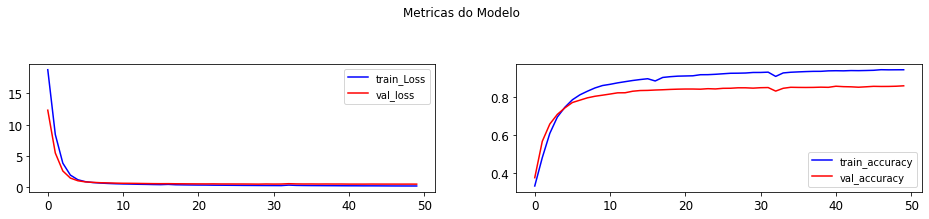

In [44]:
import matplotlib as m
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 16,8


plt.suptitle('Metricas do Modelo')

plt.subplot(3,2,1)
plt.plot(history.history['loss'],label='train_Loss',color = 'Blue')
plt.plot(history.history['val_loss'],label='val_loss',color = 'red')
plt.legend(loc='best')

plt.subplot(3,2,2)
plt.plot(history.history['accuracy'],label='train_accuracy',color = 'Blue')
plt.plot(history.history['val_accuracy'],label='val_accuracy',color = 'red')
plt.legend(loc='best')

plt.show()

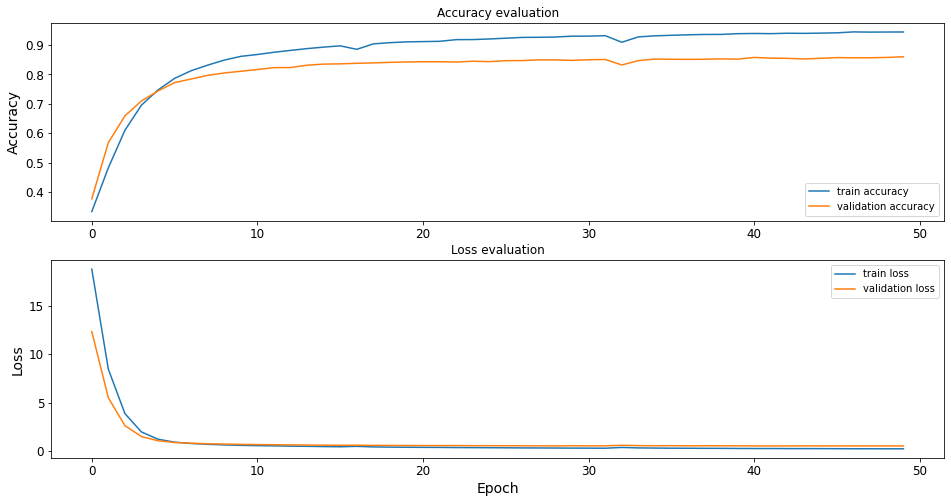

In [45]:
plot_history(history)

### Preparing Test Set

In [46]:
print(f'Targets: {data.target.unique()}')
print(f'Codes: {data.code.unique()}')
labels = dict(zip(data.target.unique(),data.code.unique()))


Targets: ['Positive', 'Neutral', 'Negative', 'Irrelevant']
Categories (4, object): ['Irrelevant', 'Negative', 'Neutral', 'Positive']
Codes: [3 2 1 0]


In [47]:
print(labels)
print(dataset_validation.columns)

{'Positive': 3, 'Neutral': 2, 'Negative': 1, 'Irrelevant': 0}
Index(['Tweet_ID', 'entity', 'sentiment', 'Tweet content'], dtype='object')


In [48]:
# encode labels
dataset_validation['code'] = dataset_validation['sentiment'].apply(lambda x: labels[x])
# processing text
dataset_validation['clean_text'] = dataset_validation['Tweet content'].apply(lambda x: processing_text(x,flag_punctuation=True,flag_stopwords=True,flag_lemma=True))

In [49]:
test_sequences = tokenizer.texts_to_sequences(dataset_validation['clean_text'])
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
inputs_test = test_padded.reshape(test_padded.shape[0],test_padded.shape[1],1)

In [50]:
print(type(inputs_test), inputs_test.shape)
targets_teste = np.array(dataset_validation['code'].to_list())
print(type(targets_teste), targets_teste.shape)

<class 'numpy.ndarray'> (1000, 810, 1)
<class 'numpy.ndarray'> (1000,)


### Evaluation 
* test set
* train set
* val set

In [51]:
accr_train = model.evaluate(inputs_train,target_train)
print('Train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_train[0],accr_train[1]))

1619/1619 [==============================] - 35s 22ms/step - loss: 0.1766 - accuracy: 0.9557
Train set
  Loss: 0.177
  Accuracy: 0.956


In [52]:
accr_val = model.evaluate(inputs_val,target_val)
print('Validation set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_val[0],accr_val[1]))

694/694 [==============================] - 14s 21ms/step - loss: 0.5131 - accuracy: 0.8595
Validation set
  Loss: 0.513
  Accuracy: 0.859


In [53]:
accr = model.evaluate(inputs_test,targets_teste)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

32/32 [==============================] - 1s 23ms/step - loss: 0.3252 - accuracy: 0.9330
Test set
  Loss: 0.325
  Accuracy: 0.933


### Other MEtrics
* Precision
* Recall
* F1

In [54]:
from sklearn.metrics import classification_report

In [55]:
predictions_train = model.predict(inputs_train)
print('Classification Report Train',classification_report(target_train, predictions_train.argmax(axis=1)))

1619/1619 [==============================] - 32s 20ms/step
Classification Report Train               precision    recall  f1-score   support

           0       0.99      0.93      0.96      9004
           1       0.98      0.95      0.97     15694
           2       0.98      0.95      0.96     12622
           3       0.90      0.98      0.94     14477

    accuracy                           0.96     51797
   macro avg       0.96      0.95      0.96     51797
weighted avg       0.96      0.96      0.96     51797



In [56]:
predictions_val = model.predict(inputs_val)
print('Classification Report Val',classification_report(target_val, predictions_val.argmax(axis=1)))

694/694 [==============================] - 14s 19ms/step
Classification Report Val               precision    recall  f1-score   support

           0       0.87      0.81      0.84      3871
           1       0.90      0.87      0.88      6664
           2       0.88      0.83      0.86      5486
           3       0.80      0.91      0.85      6178

    accuracy                           0.86     22199
   macro avg       0.86      0.85      0.86     22199
weighted avg       0.86      0.86      0.86     22199



In [57]:
predictions_test = model.predict(inputs_test)
print('Classification Report Test',classification_report(targets_teste, predictions_test.argmax(axis=1)))

32/32 [==============================] - 1s 19ms/step
Classification Report Test               precision    recall  f1-score   support

           0       0.93      0.95      0.94       172
           1       0.92      0.95      0.94       266
           2       0.95      0.91      0.93       285
           3       0.93      0.93      0.93       277

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



In [59]:
# from sklearn.metrics import confusion_matrix

# confusion_matrix(targets, pred)

In [60]:
pip install scikit-plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


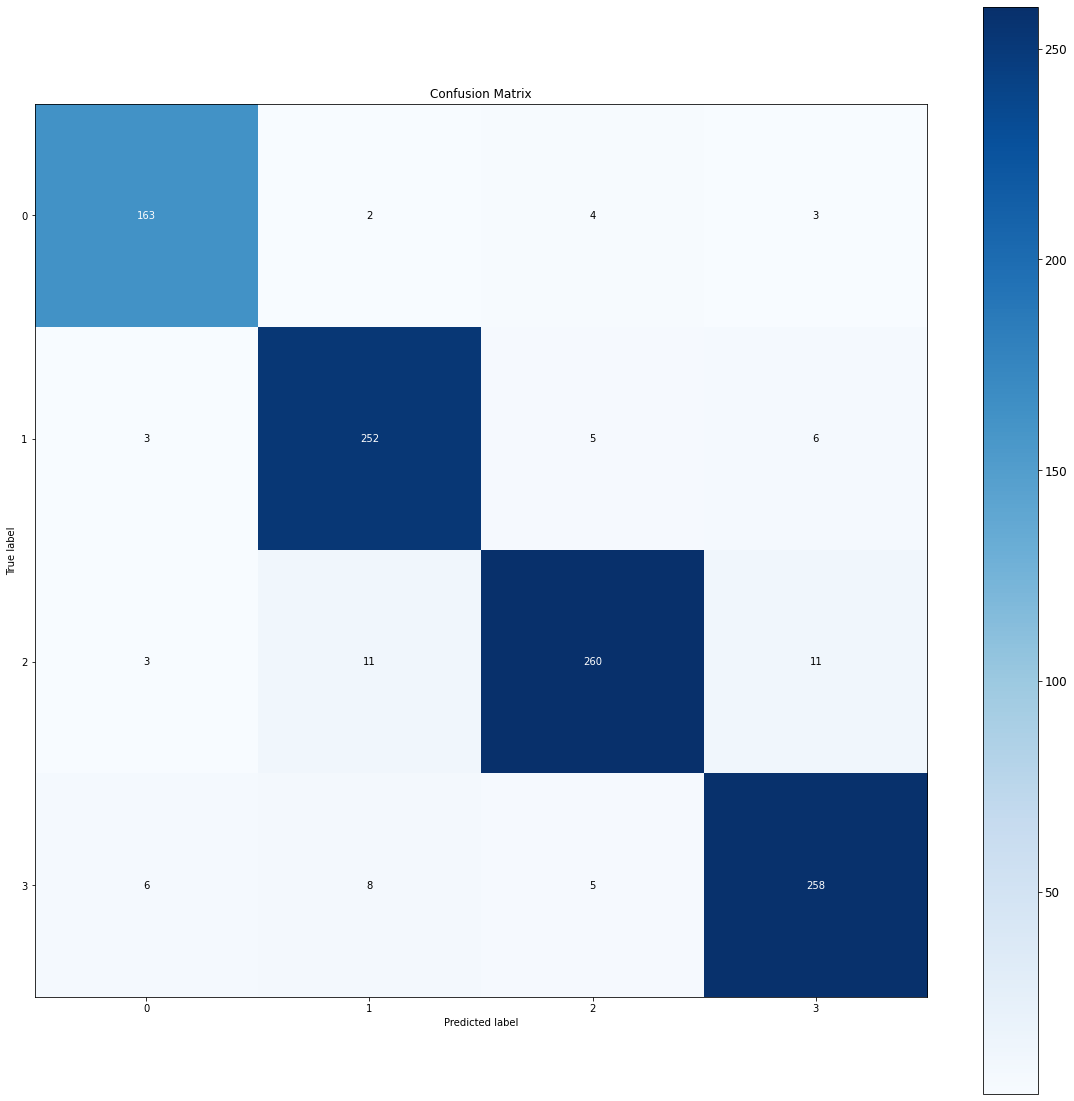

In [61]:
import scikitplot as skplt
from sklearn.metrics import classification_report

# print(classification_report(targets, pred))
skplt.metrics.plot_confusion_matrix(targets_teste, predictions_test.argmax(axis=1),figsize=(20,20))